<a href="https://colab.research.google.com/github/Alriyan1/Gen-AI/blob/main/Text_Embedding_example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install langchain langchain_huggingface langchain_google_genai

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.6/50.6 kB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 11.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.4/40.4 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 408.0/408.0 kB 29.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.9/296.9 kB 22.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 255.8/255.8 kB 20.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.4/76.4 kB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.0/78.0 kB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 144.5/144.5 kB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 4.7 MB/s eta 0:00:00


In [2]:
import os
os.environ["GOOGLE_API_KEY"]="*******************************"

In [3]:
from langchain_google_genai import GoogleGenerativeAIEmbeddings

In [4]:
embedding = GoogleGenerativeAIEmbeddings(model='models/embedding-001')

In [5]:
import pandas as pd
df = pd.read_excel("mydata.xlsx")
print(df)

         words
0     elephant
1         lion
2        tiger
3          dog
4      cricket
5     football
6   basketball
7       tennis
8       school
9      college
10         car
11        bike
12       apple
13      orange
14      banana


In [6]:
df['embedding']=df['words'].apply(lambda x: embedding.embed_query(x))
df.to_csv("embedded_data.csv")

In [7]:
new_df = pd.read_csv("embedded_data.csv")
print(new_df)

    Unnamed: 0       words                                          embedding
0            0    elephant  [0.030281059443950653, -0.04183235391974449, -...
1            1        lion  [0.03412351384758949, -0.017239149659872055, -...
2            2       tiger  [0.007136269006878138, -0.05418975278735161, -...
3            3         dog  [0.03660140559077263, -0.03368831053376198, -0...
4            4     cricket  [0.03693900629878044, -0.058867961168289185, -...
5            5    football  [0.013791220262646675, -0.04745679348707199, -...
6            6  basketball  [0.026667578145861626, -0.027487624436616898, ...
7            7      tennis  [0.03007414937019348, -0.030739130452275276, 0...
8            8      school  [0.04013838246464729, -0.04822907596826553, -0...
9            9     college  [0.05244437977671623, -0.06668107211589813, -0...
10          10         car  [0.004475397523492575, -0.04600771889090538, -...
11          11        bike  [-0.0055679152719676495, -0.02927535

In [8]:
our_text='mango'

In [9]:
text_embedding = embedding.embed_query(our_text)

In [10]:
print(text_embedding)

[0.05665839836001396, -0.03795262426137924, -0.056044526398181915, -0.013580896891653538, 0.016215147450566292, 0.02561153843998909, -0.008182329125702381, -0.01790596917271614, 0.007823583669960499, 0.082661934196949, 0.0074712904170155525, -0.004240517504513264, -0.004429180175065994, -0.05502054840326309, -0.012969824485480785, -0.02519754320383072, 0.047779157757759094, 0.029251858592033386, 0.014283576048910618, -0.019301164895296097, -0.03143458813428879, 0.0692485123872757, -0.05133257433772087, 0.011798247694969177, 0.006227557081729174, 0.04077441990375519, 0.06835675239562988, -0.057680655270814896, -0.06012027710676193, 0.003698116634041071, -0.06992987543344498, 0.021233081817626953, -0.09142884612083435, 0.012936525046825409, 0.037700310349464417, -0.0009537592995911837, -0.02887793816626072, -0.009929259307682514, 0.026712410151958466, 0.005031894892454147, -0.0008811260340735316, -0.028886791318655014, -0.008251442573964596, -0.023341510444879532, 0.04504477232694626, -0

In [12]:
from sklearn.metrics.pairwise import cosine_similarity

df['similarity_score']=df['embedding'].apply(lambda x: cosine_similarity([x], [text_embedding])[0][0])
df

,words,embedding,similarity_score
0,elephant,"[0.030281059443950653, -0.04183235391974449, -...",0.686993
1,lion,"[0.03412351384758949, -0.017239149659872055, -...",0.680607
2,tiger,"[0.007136269006878138, -0.05418975278735161, -...",0.672340
3,dog,"[0.03660140559077263, -0.03368831053376198, -0...",0.668133
4,cricket,"[0.03693900629878044, -0.058867961168289185, -...",0.655727
5,football,"[0.013791220262646675, -0.04745679348707199, -...",0.650617
6,basketball,"[0.026667578145861626, -0.027487624436616898, ...",0.650153
7,tennis,"[0.03007414937019348, -0.030739130452275276, 0...",0.606179
8,school,"[0.04013838246464729, -0.04822907596826553, -0...",0.618422
9,college,"[0.05244437977671623, -0.06668107211589813, -0...",0.621279


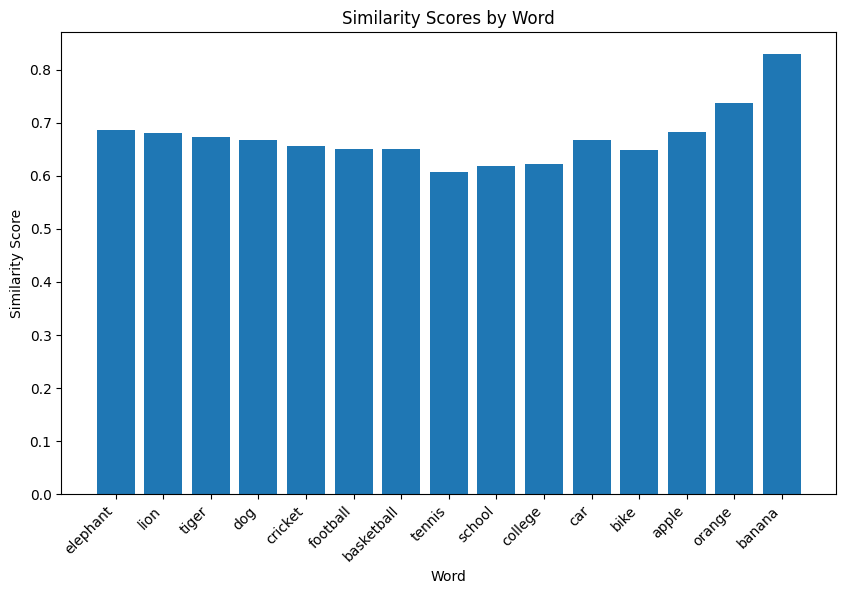

In [13]:
# @title Similarity Scores by Word

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.bar(df['words'], df['similarity_score'])
plt.title('Similarity Scores by Word')
plt.xlabel('Word')
plt.ylabel('Similarity Score')
_ = plt.xticks(rotation=45, ha='right')

In [15]:
from tensorflow.keras.losses import cosine_similarity

In [29]:
df["tf_similarity"]=df['embedding'].apply(lambda x: cosine_similarity(x, text_embedding).numpy())
df

,words,embedding,similarity_score,tf_similarity
0,elephant,"[0.030281059443950653, -0.04183235391974449, -...",0.686993,-0.686993
1,lion,"[0.03412351384758949, -0.017239149659872055, -...",0.680607,-0.680607
2,tiger,"[0.007136269006878138, -0.05418975278735161, -...",0.672340,-0.672341
3,dog,"[0.03660140559077263, -0.03368831053376198, -0...",0.668133,-0.668133
4,cricket,"[0.03693900629878044, -0.058867961168289185, -...",0.655727,-0.655727
5,football,"[0.013791220262646675, -0.04745679348707199, -...",0.650617,-0.650617
6,basketball,"[0.026667578145861626, -0.027487624436616898, ...",0.650153,-0.650153
7,tennis,"[0.03007414937019348, -0.030739130452275276, 0...",0.606179,-0.606179
8,school,"[0.04013838246464729, -0.04822907596826553, -0...",0.618422,-0.618422
9,college,"[0.05244437977671623, -0.06668107211589813, -0...",0.621279,-0.621279


from matplotlib import pyplot as plt
df['similarity_score'].plot(kind='hist', bins=20, title='similarity_score')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df['tf_similarity'].plot(kind='hist', bins=20, title='tf_similarity')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='similarity_score', y='tf_similarity', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df['similarity_score'].plot(kind='line', figsize=(8, 4), title='similarity_score')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
df['tf_similarity'].plot(kind='line', figsize=(8, 4), title='tf_similarity')
plt.gca().spines[['top', 'right']].set_visible(False)

In [19]:
df.sort_values('similarity_score',ascending=False).head()

,words,embedding,similarity_score
14,banana,"[0.038012031465768814, -0.03181586414575577, -...",0.828724
13,orange,"[0.024126991629600525, -0.07811449468135834, -...",0.737215
0,elephant,"[0.030281059443950653, -0.04183235391974449, -...",0.686993
12,apple,"[0.05446118116378784, -0.00923842005431652, -0...",0.681516
1,lion,"[0.03412351384758949, -0.017239149659872055, -...",0.680607
